<a href="https://colab.research.google.com/github/PAVAN143258/YBI_PROJECTS/blob/main/Project_8_Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imporing Libraries

In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## LOADING DATA

In [3]:
data = pd.read_csv("/content/DiamondPrices (1).csv")
data.head()

,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53940, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sn       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
data.describe()

,sn,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
data = data.drop(["sn"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [10]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

In [14]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


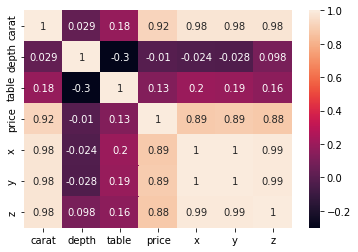

In [13]:
sns.heatmap(data.corr(),annot=True)

In [15]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [16]:
# Feature Engineering
data['Symmetry']= data['x']/data['y']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Symmetry
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [17]:
data=data.dropna(axis=0)
data_new= pd.get_dummies(data)
X=data_new.drop(['price','x','y','z'], axis=1)
y=data_new['price']
features=X.columns

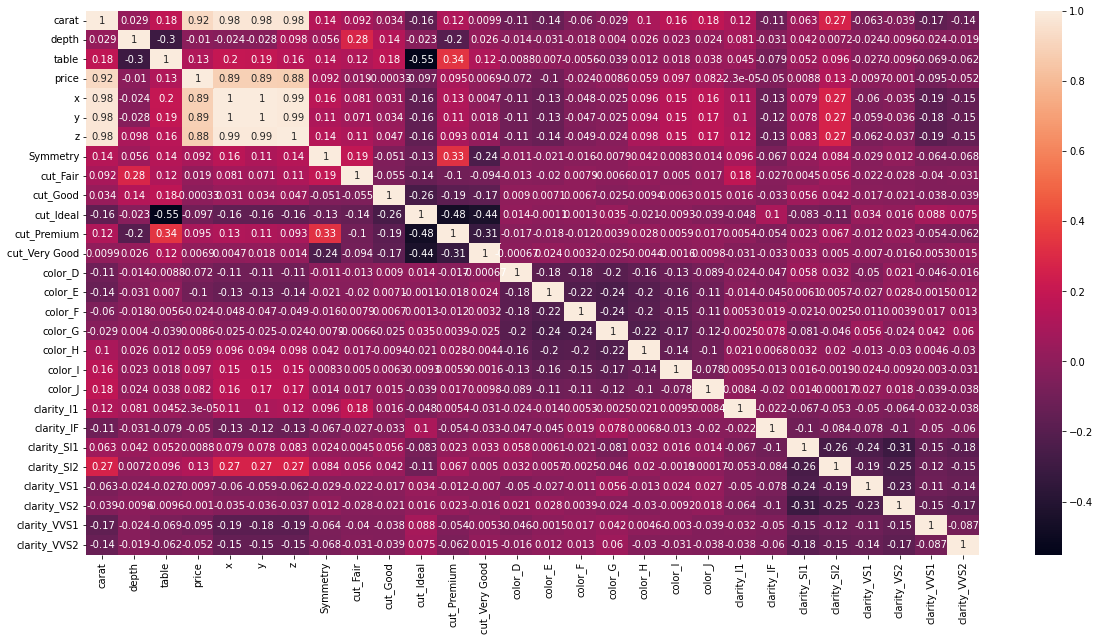

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(data_new.corr(), annot=True)

In [19]:
#Scale the data
scaler=StandardScaler()
print(scaler.fit_transform(X))

[[-1.19813241 -0.17586096 -1.10323546 ... -0.54228058 -0.26965177
  -0.32206262]
 [-1.24034782 -1.37295458  1.59202201 ... -0.54228058 -0.26965177
  -0.32206262]
 [-1.19813241 -3.41505547  3.38886032 ... -0.54228058 -0.26965177
  -0.32206262]
 ...
 [-0.20607021  0.73956358  1.14281243 ... -0.54228058 -0.26965177
  -0.32206262]
 [ 0.13165309 -0.52794732  0.24439328 ... -0.54228058 -0.26965177
  -0.32206262]
 [-0.10053168  0.31705995 -1.10323546 ... -0.54228058 -0.26965177
  -0.32206262]]


In [20]:
X_train,X_test,y_train,y_test= train_test_split(X,y)

## Prdiction and Evaluate the Model Performance

In [21]:
model_eval=pd.DataFrame(index=['Null','KNN','MLR'], columns=['RMSE'])

In [22]:
y_pred_null= y_train.mean()

## K-Neighbours Regressor

In [23]:
knn= KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [24]:
y_pred= knn.predict(X_test)

In [25]:
rf= RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [26]:
y_pred2= y_pred= rf.predict(X_test)

## Linear Regression

In [27]:
lin= LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred3= lin.predict(X_test)

## Lasso Regression

In [32]:
lasso= Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [33]:
y_pred4= lasso.predict(X_test)

In [34]:
model_eval=pd.DataFrame(index=['KNN','MLR'], columns=['RMSE'])
model_eval.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred))
model_eval.loc['RF','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred2))
model_eval.loc['MLR','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred3))
model_eval.loc['Lasso','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred4))
model_eval.loc['Null','RMSE']=y_pred_null
model_eval

,RMSE
KNN,549.572305
MLR,1144.650222
RF,549.572305
Lasso,1145.746061
Null,3943.292802


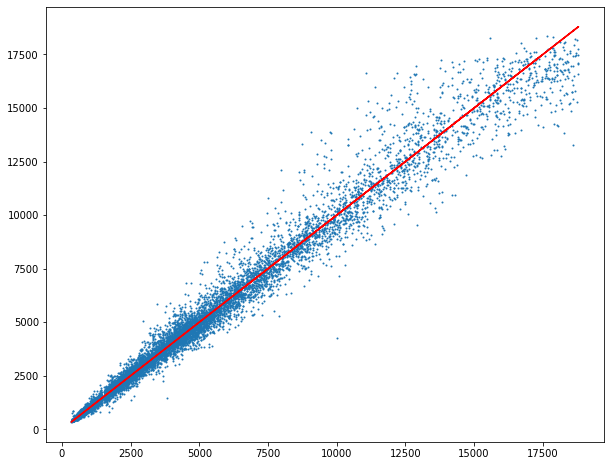

In [35]:
fig, ax= plt.subplots(figsize=(10,8))
ax.scatter(y_test,y_pred,s=1)
ax.plot(y_test, y_test, color='red')